###Importing all important libraries[link text](https://)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

###Importing the dataset from Github

In [2]:
url = 'https://raw.githubusercontent.com/YiLi225/NeptuneBlogs/main/stock_market_data-AAPL.csv'
df = pd.read_csv(url,index_col='Date',parse_dates=True,infer_datetime_format=True)
df

,Unnamed: 0,Low,High,Close,Open
Date,,,,,
2021-07-06,5453,140.070,143.15,142.02,140.07
2021-07-02,5452,137.745,140.00,139.96,137.90
2021-07-01,5451,135.760,137.33,137.27,136.60
2021-06-30,5450,135.870,137.41,136.96,136.17
2021-06-29,5449,134.350,136.49,136.33,134.80
...,...,...,...,...,...
1999-11-05,4,84.000,88.37,88.31,84.62
1999-11-04,3,80.620,85.37,83.62,82.06
1999-11-03,2,81.000,83.25,81.50,81.62


###Visualising and looking at the dataset

In [3]:
df.shape

(5454, 5)

In [4]:
df.isnull().sum()

Unnamed: 0    0
Low           0
High          0
Close         0
Open          0
dtype: int64

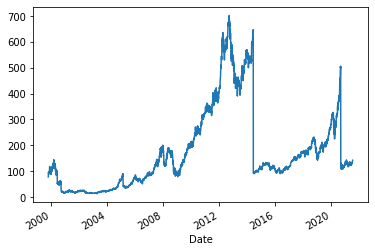

In [5]:
df.Close.plot()

###Scaling the dataset

In [7]:
features=['Open','Low','High']
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,Low,High
Date,,,
2021-07-06,0.184329,0.185412,0.187836
2021-07-02,0.181181,0.182027,0.183283
2021-07-01,0.179296,0.179137,0.179424
2021-06-30,0.178672,0.179297,0.179540
2021-06-29,0.176685,0.177084,0.178210


###Splitting the dataset into training and test in ratio of 0.2

In [8]:
output_var=pd.DataFrame(df.Close)
X = df[features]
y = pd.DataFrame(df['Close'])
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

###Reshaping the array to fit it for feeding into the agorithm

In [9]:
trainX =np.array(X_train)
testX =np.array(X_test) 
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

###Building the model

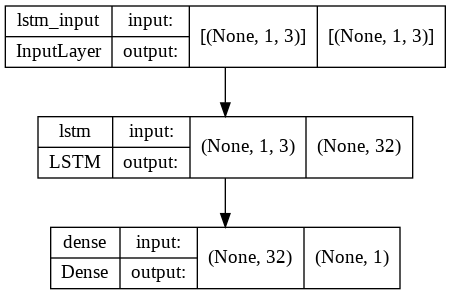

In [10]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

###Training the model

In [15]:
history = lstm.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, shuffle=False)

Epoch 1/50
620/620 [==============================] - 1s 2ms/step - loss: 6.9123
Epoch 2/50
620/620 [==============================] - 1s 2ms/step - loss: 6.8602
Epoch 3/50
620/620 [==============================] - 1s 2ms/step - loss: 6.8096
Epoch 4/50
620/620 [==============================] - 1s 2ms/step - loss: 6.7604
Epoch 5/50
620/620 [==============================] - 1s 2ms/step - loss: 6.7129
Epoch 6/50
620/620 [==============================] - 1s 2ms/step - loss: 6.6672
Epoch 7/50
620/620 [==============================] - 1s 2ms/step - loss: 6.6232
Epoch 8/50
620/620 [==============================] - 1s 2ms/step - loss: 6.5811
Epoch 9/50
620/620 [==============================] - 1s 2ms/step - loss: 6.5409
Epoch 10/50
620/620 [==============================] - 1s 2ms/step - loss: 6.5026
Epoch 11/50
620/620 [==============================] - 1s 2ms/step - loss: 6.4661
Epoch 12/50
620/620 [==============================] - 1s 2ms/step - loss: 6.4317
Epoch 13/50
620/620 [====

###Predicting through model

In [16]:
y_pred= lstm.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

rms = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test,y_pred)
print('rms', rms, ' r2 ', r2)

rms 1.8228023542866643  r2  0.9979562888729694


###Comparing predicted and actual through visualisation

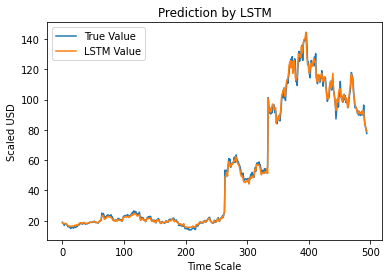

In [14]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()
plt.close()

###Conclusion
As evident, the model we built was very well trained